# This notebook is part of Section 5.1

## Import the libraries

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy as sp

## Import the dataset

In [2]:
os.chdir('D:')
os.getcwd()
cars_df=pd.read_excel('cars.xls')
cars_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140,3449,10.5,70,US


## See the dataset info

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
Model           392 non-null object
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null int64
Weight          392 non-null int64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 27.6+ KB


## Choose one variable to be the input and one to be the output

In [4]:
y=cars_df.MPG 
X=cars_df.Horsepower

## Split the dataset

In [5]:
X_train,X_test,y_train,y_test=train_test_split(pd.DataFrame(X),y,test_size=0.3,random_state=42)

## Fit the model

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Test the model

In [7]:
y_prediction = regressor.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

4.955413560049774


# Train with SpiPy

In [8]:
X_multi=sm.tools.tools.add_constant(X_train, prepend=True, has_constant='skip')

In [9]:
# OLS Regression
mod = sm.OLS(y_train, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     455.7
Date:                Thu, 30 May 2019   Prob (F-statistic):           4.55e-60
Time:                        01:39:08   Log-Likelihood:                -823.78
No. Observations:                 274   AIC:                             1652.
Df Residuals:                     272   BIC:                             1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0848      0.869     47.255      0.0

## Plot

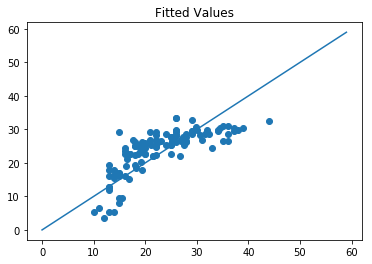

In [10]:
# add your actual vs. predicted points
plt.scatter(y_test, regressor.predict(X_test))
# add the line of perfect fit
straight_line = np.arange(0, 60)
plt.plot(straight_line, straight_line)
plt.title("Fitted Values")
plt.show()

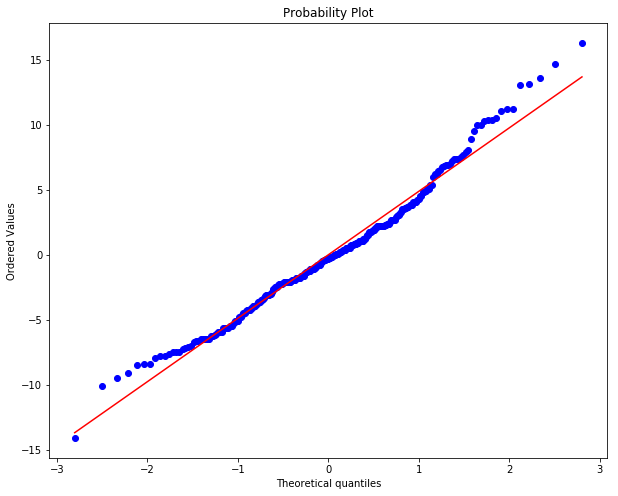

In [11]:
pred_val1 = res.fittedvalues.copy()
residual_train = y_train - pred_val1
fig, ax = plt.subplots(figsize=(10,8))
_, (__, ___, r) = sp.stats.probplot(residual_train, plot=ax, fit=True)
r**2
plt.show()

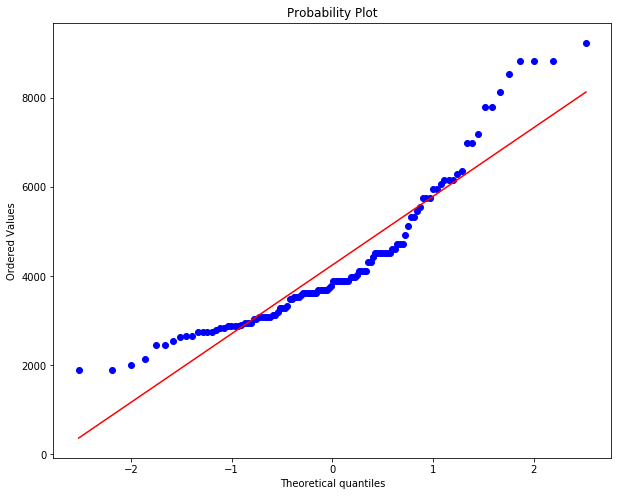

In [12]:
X_test['const']=1
residual_test = res.predict(X_test)
fig, ax = plt.subplots(figsize=(10,8))
_, (__, ___, r) = sp.stats.probplot(residual_test, plot=ax, fit=True)
plt.show()

# Multiple Regression

## Choose the variables

In [13]:
y=cars_df.MPG
X=cars_df[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin']]

## Dummy Variable

In [14]:
X=pd.get_dummies(X,drop_first=True)

## Split the dataset

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Scale the dataset

In [16]:
scaler=MinMaxScaler()
X_train_sc=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_prediction = regressor.predict(X_test_sc)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

3.216235254988254


In [19]:
X_multi=sm.tools.tools.add_constant(X_train, prepend=True, has_constant='skip')
# OLS Regression
mod = sm.OLS(y_train, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     157.8
Date:                Thu, 30 May 2019   Prob (F-statistic):           3.78e-96
Time:                        01:39:09   Log-Likelihood:                -718.66
No. Observations:                 274   AIC:                             1455.
Df Residuals:                     265   BIC:                             1488.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.3960      5.861     -2.456   